# AR(1) process

Consider a AR(1) process for $r_{t+1}$ with $\phi_0 = 0.02$, and $\phi_1 = 0.9$

Import Modules

In [1]:
#import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm
import sympy as sym
import statsmodels.api
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

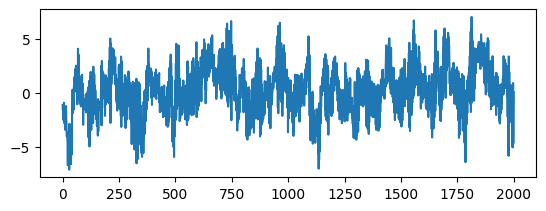

In [3]:
# Plot 1 : AR parameter 0.2, 0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -0.02, -0.9])
AR_object1 = ArmaProcess(ar1)

# Creating and plotting time series function of AR(1) process
simulated_data_1 = AR_object1.generate_sample(nsample = 2000)
plt.plot(simulated_data_1)

1. Plot the autocorrelation function for this process

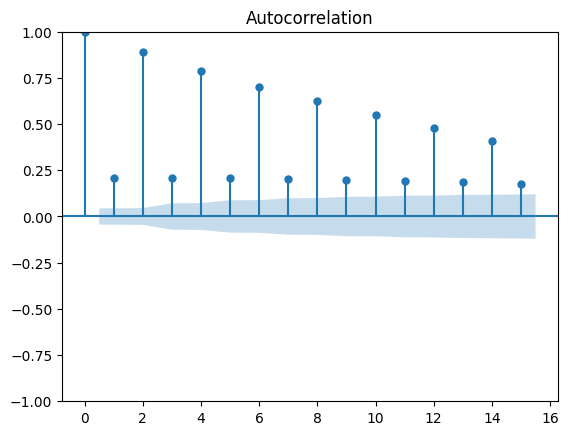

In [4]:
# Plotting the autocorrelation function for AR(1) Process with 10 lags
plot_acf(simulated_data_1, lags = 15)
pyplot.show()

2. Is the process stationary?

Yes, because the plot indicates the mean and the variance of $r_{t+1}$ is very apporximate

Note that we can express the current value of an AR(1) as a function of past shocks, $\epsilon$
In particular, define $x_t = r_t - \mu$, where $\mu = E(r_t)$. Then <br>

**Applying the Box-Jenkins methodology **bold text**

Data for the Producer Price Index. Our goal is to develop a quarterly model for the PPI, so we can come up with forecasts.

In [6]:
df = pd.read_excel(r'PPIFGS.xls', sheet_name = 'PPIFGS')
df.index = df['DATE']
df

,DATE,VALUE
DATE,,
1947-04-01,1947-04-01,26.2
1947-07-01,1947-07-01,26.7
1947-10-01,1947-10-01,27.7
1948-01-01,1948-01-01,28.0
1948-04-01,1948-04-01,28.6
...,...,...
2014-07-01,2014-07-01,201.3
2014-10-01,2014-10-01,196.7
2015-01-01,2015-01-01,193.3


1) Plot the PPI in levels

<Axes: title={'center': 'PPI levels'}, xlabel='DATE'>

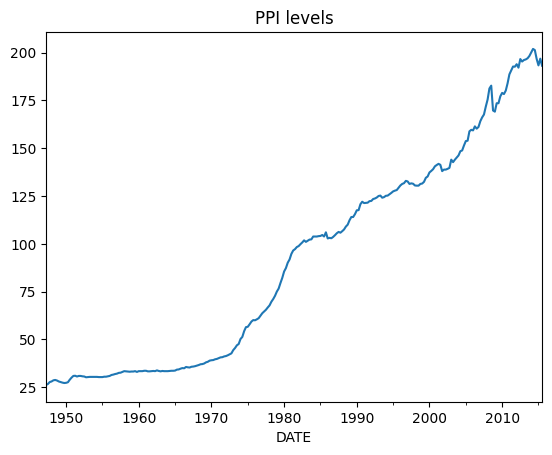

In [7]:
df['VALUE'].plot(title = 'PPI levels')

2) Plot delta PPI

<Axes: title={'center': 'Change in PPI'}, xlabel='DATE'>

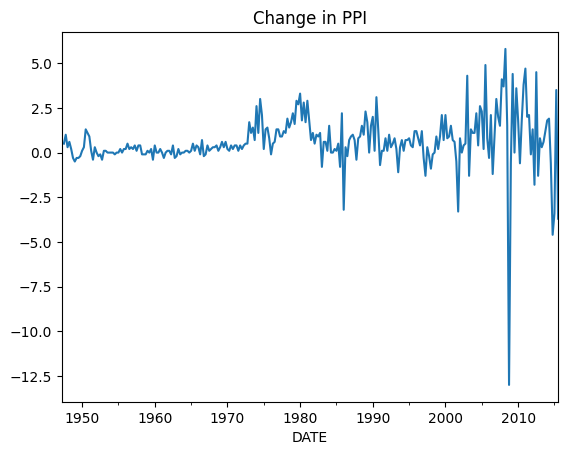

In [8]:
df['delta_PPI'] = df['VALUE'] - df['VALUE'].shift(1)
df['delta_PPI'].plot(title = 'Change in PPI')

3) Plot log PPI

<Axes: title={'center': 'log PPI'}, xlabel='DATE'>

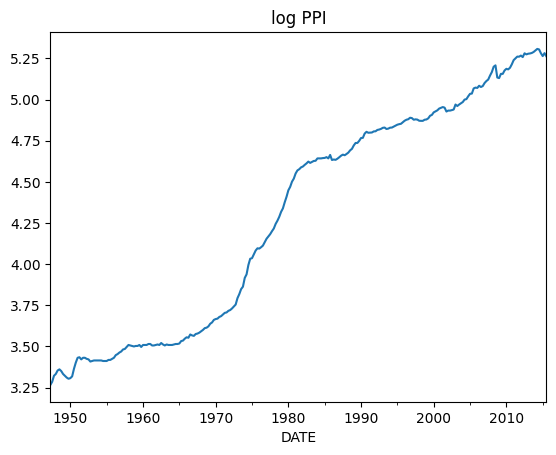

In [9]:
df['log_PPI'] = np.log(df['VALUE'])
df['log_PPI'].plot(title = 'log PPI')

4) Plot delta log PPI

<Axes: title={'center': 'Change in log PPI'}, xlabel='DATE'>

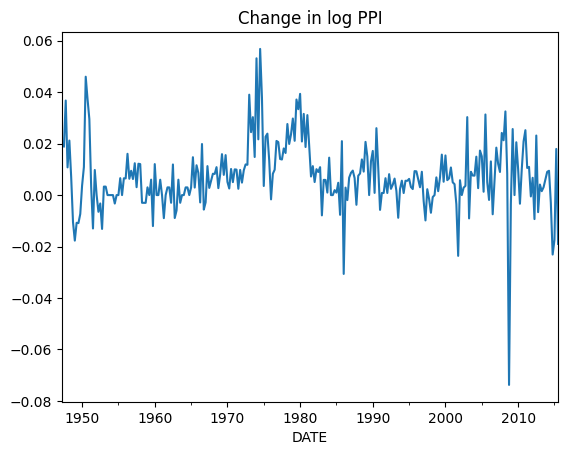

In [10]:
df['delta_log_PPI'] = df['log_PPI'] - df['log_PPI'].shift(1)
df['delta_log_PPI'].plot(title = 'Change in log PPI')